In [138]:
import numpy as np
from scipy.optimize import fsolve
from numpy import radians, sin, cos
from matplotlib import pyplot as plt

# %matplotlib inline
%matplotlib widget

In [129]:
# #known values
# L1 = 9
# L2 = 2.2
# L3 = 4
# L4 = 6
# L5 = 1
# L6 = 6
# L7 = 10
# L8 = 1
# L9 = 9
# L10 = 1
# L11 = 6
# Lx = 6.814
# theta1 = radians(-90)
# theta2 = radians(-105.8)
# thetaA = radians(10)
# thetaB = radians(2)
# thetaC = radians(2)
# thetaD = radians(2)

# sample_guess = [
#     radians(-114.7), #thetaX
#     radians(-44.6), #theta3
#     radians(-34.6), #theta4
#     radians(-36.6), #theta5
#     radians(-23.8), #theta6
#     radians(-149.9), #theta7
#     radians(-148.1), #theta8
#     radians(-150.1), #theta9
#     radians(-36.6), #theta10
#     radians(-34.6), #theta11
# ]

L1 = 2.7
L2 = 1
L3 = 1.2
L4 = 1.6
L5 = 0.6
L6 = 1.85
L7 = 3.5
L8 = 0.6
L9 = 3
L10 = 0.6
L11 = 2
Lx = 2.28
theta1 = radians(-90)
theta2 = radians(-105.8)
thetaA = radians(10)
thetaB = radians(2)
thetaC = radians(2)
thetaD = radians(10)

#known values
def reset_link_constants():
    global L1, L2, L3, L4, L5, L6, L7, L8, L9, L10, L11, Lx, theta1, theta2, thetaA, thetaB, thetaC, thetaD
    L1 = 2.7
    L2 = 1
    L3 = 1.2
    L4 = 1.6
    L5 = 0.6
    L6 = 1.85
    L7 = 3.5
    L8 = 0.6
    L9 = 3
    L10 = 0.6
    L11 = 2
    Lx = 2.28
    theta1 = radians(-90)
    theta2 = radians(-105.8)
    thetaA = radians(10)
    thetaB = radians(2)
    thetaC = radians(2)
    thetaD = radians(10)

reset_link_constants()

sample_guess = [
    radians(-116.2), #thetaX
    radians(-33), #theta3
    radians(-23), #theta4
    radians(-25), #theta5
    radians(-9.3), #theta6
    radians(-142.9), #theta7
    radians(-140.5), #theta8
    radians(-142.5), #theta9
    radians(-35.3), #theta10
    radians(-33.3), #theta11
]

In [130]:
def solveLegPos(guess, doPlot=False):

    def func(angles):

        [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = angles

        return [
            Lx*cos(thetaX) + L3*cos(theta3) - L1*cos(theta1),
            Lx*sin(thetaX) + L3*sin(theta3) - L1*sin(theta1),

            L4*cos(theta4) + L5*cos(theta5) - L6*cos(theta6) - L2*cos(theta2) + L8*cos(theta8),
            L4*sin(theta4) + L5*sin(theta5) - L6*sin(theta6) - L2*sin(theta2) + L8*sin(theta8),

            L5*cos(theta5) + L8*cos(theta8) + L9*cos(theta9) - L7*cos(theta7) - L10*cos(theta10),
            L5*sin(theta5) + L8*sin(theta8) + L9*sin(theta9) - L7*sin(theta7) - L10*sin(theta10),
            
            theta4 - theta3 - thetaA,
            theta5 - theta4 + thetaB,
            theta9 - theta8 + thetaC,
            theta11 - theta10 - thetaD
        ]

    root, infodict, ier, msg = fsolve(func, guess, full_output=1)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    if doPlot:
        print("error:",np.linalg.norm(func(root)))

        origin = np.zeros(2)
        vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
        vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
        vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
        vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
        vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
        vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
        vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
        vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
        vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
        vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
        vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
        vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

        #[x0, y0, x1, y1]
        linkX = np.array([origin, vecX])
        link1 = np.array([origin, vec1])
        link2 = np.array([link1[1], link1[1] + vec2])
        link3 = np.array([linkX[1], linkX[1] + vec3])
        link4 = np.array([link1[1], link1[1] + vec4])
        link5 = np.array([link4[1], link4[1] + vec5])
        link6 = np.array([link2[1], link2[1] + vec6])
        link7 = np.array([link4[1], link4[1] + vec7])
        link8 = np.array([link5[1], link5[1] + vec8])
        link9 = np.array([link8[1], link8[1] + vec9])
        link10 = np.array([link7[1], link7[1] + vec10])
        link11 = np.array([link10[1], link10[1] + vec11])

        links = np.array([linkX, link1, link2, link3, link4, link5,
                        link6, link7, link8, link9, link10, link11])

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axis([-16, 16, -30, 2])
        plt.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
                angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)

    #return position of foot
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    footpos = vec1 + vec4 + vec7 + vec10 + vec11

    return footpos, ier, root

In [131]:
def plotLinks(color, alpha, ax=plt):


    footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    origin = np.zeros(2)
    vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
    vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
    vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
    vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    # [x0, y0, x1, y1]
    linkX = np.array([origin, vecX])
    link1 = np.array([origin, vec1])
    link2 = np.array([link1[1], link1[1] + vec2])
    link3 = np.array([linkX[1], linkX[1] + vec3])
    link4 = np.array([link1[1], link1[1] + vec4])
    link5 = np.array([link4[1], link4[1] + vec5])
    link6 = np.array([link2[1], link2[1] + vec6])
    link7 = np.array([link4[1], link4[1] + vec7])
    link8 = np.array([link5[1], link5[1] + vec8])
    link9 = np.array([link8[1], link8[1] + vec9])
    link10 = np.array([link7[1], link7[1] + vec10])
    link11 = np.array([link10[1], link10[1] + vec11])

    links = np.array([linkX, link1, link2, link3, link4, link5,
                    link6, link7, link8, link9, link10, link11])

    ax.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
            angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2, alpha=alpha, color=color)

    try:
        # ax.set_xlim(-20, 20)
        # ax.set_ylim(-38, 2)
        ax.set(adjustable='box', aspect='equal')
    except:
        # ax.xlim(-18, 18)
        # ax.ylim(-34, 2)
        ax.axis('equal')

    return links


In [139]:
def try_config(min_Lx=4, max_Lx=8.4, step=0.1):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

    ax1.scatter(0, 0)

    foot_xs = []
    foot_ys = []
    Lxs = []

    for testcase in np.arange(min_Lx, max_Lx, step=step):
        globals()['Lx'] = testcase
        footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

        if ier==1:

            plotLinks('k', 0.1, ax1)

            foot_xs.append(footpos[0])
            foot_ys.append(footpos[1])
            Lxs.append(testcase)

    foot_vs = []
    for i in range(1, len(foot_xs)):
        foot_vs.append(np.linalg.norm([foot_xs[i] - foot_xs[i-1], foot_ys[i] - foot_ys[i-1]]))

    foot_xs = foot_xs[1:]
    foot_ys = foot_ys[1:]
    Lxs = Lxs[1:]

    globals()['Lx'] = min(Lxs)
    plotLinks('r', 0.5, ax1)
    globals()['Lx'] = max(Lxs)
    plotLinks('b', 0.5, ax1)
    ax1.scatter(foot_xs, foot_ys, c=foot_vs, s=10)

    ma = []
    for foot_v in foot_vs:
        if foot_v != 0:
            ma.append(step/foot_v) #ma is input v / output v
        else:
            ma.append(999)

    contractions = [max_Lx - Lxi for Lxi in Lxs]

    ax2.plot(contractions, ma, 'o')
    ax2.set_xlim(0, max_Lx-min_Lx)
    ax2.set_ylim(0, 0.3)
    ax2.set_xlabel('TSA contraction')
    ax2.set_ylabel('mech advantage')

    x_travel = max(foot_xs) - min(foot_xs)
    y_travel = max(foot_ys) - min(foot_ys)

    displacement = np.sqrt(x_travel**2 + y_travel**2)

    distance = 0
    for i in range(1, len(foot_xs)):
        distance += np.sqrt((foot_xs[i] - foot_xs[i-1])**2 + (foot_ys[i] - foot_ys[i-1])**2)


    return y_travel, distance/displacement

![title](linkvars.png)

(4.572879242020541, 1.0071268460850644)
(5.000447940830864, 1.0111317343297916)


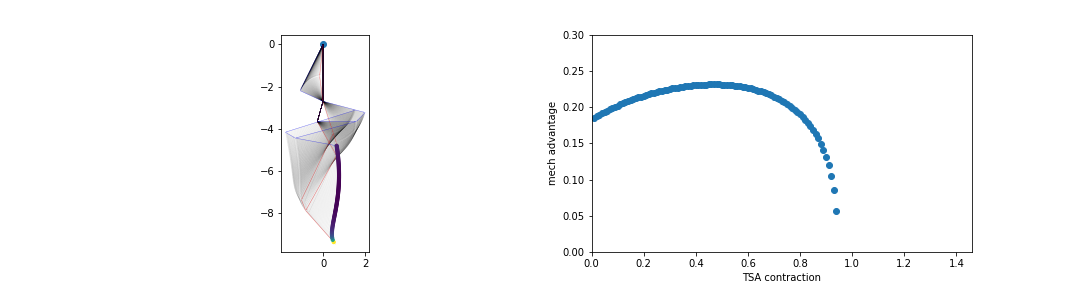

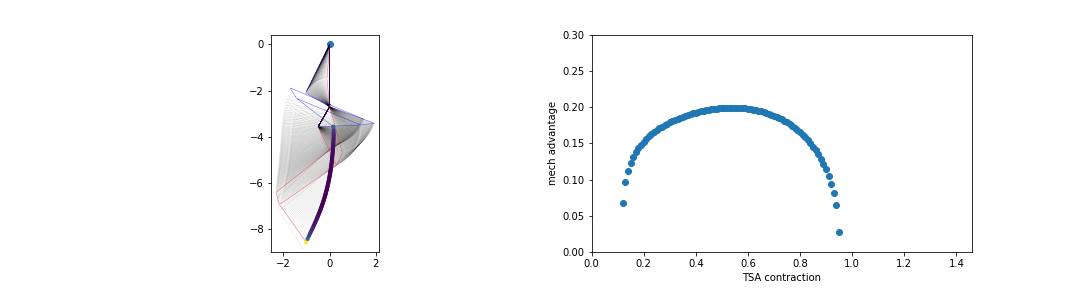

In [189]:
reset_link_constants()
# print(try_config(min_Lx=1, max_Lx=3, step=0.02))
#changed values
# L1 = 2.7
L2 = 1
# L3 = 1.2
# L4 = 1.6
L5 = 0.47
# L6 = 1.95
# L7 = 3.5
# L8 = 0.6
# L9 = 3
L10 = 0.55
# L11 = 2
# theta1 = radians(-90)
theta2 = radians(-120)
# thetaA = radians(10)
thetaB = radians(0)
thetaC = radians(30)
thetaD = radians(20)
print(try_config(min_Lx=1, max_Lx=2.46, step=0.01))

reset_link_constants()
# L1 = 2.7
L2 = 1.1
# L3 = 1.2
# L4 = 1.6
L5 = 0.47
# L6 = 1.95
# L7 = 3.5
# L8 = 0.6
# L9 = 3
L10 = 0.55
# L11 = 2
# theta1 = radians(-90)
theta2 = radians(-120)
# thetaA = radians(10)
thetaB = radians(0)
thetaC = radians(30)
thetaD = radians(20)
print(try_config(min_Lx=1, max_Lx=2.46, step=0.01))



In [92]:
from scipy.optimize import *
def objective(param, info={'Nfeval':0}, min_Lx=4, max_Lx=8, step=0.05, doPlot=False):
    g = globals()
    g['L1'] = param[0]
    g['L2'] = param[1]
    g['L3'] = param[2]
    g['L4'] = param[3]
    g['L5'] = param[4]
    g['L6'] = param[5]
    g['L7'] = param[6]
    g['L8'] = param[7]
    g['L9'] = param[8]
    g['L10'] = param[9]
    g['L11'] = param[10]
    g['theta1'] = param[11]
    g['theta2'] = param[12]
    g['thetaA'] = param[13]
    g['thetaB'] = param[13]
    g['thetaC'] = param[14]
    g['thetaD'] = param[15]

    foot_ys = []

    for testcase in np.arange(min_Lx, max_Lx, step=step):
        g['Lx'] = testcase
        footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

        if ier==1:
            if(doPlot): plotLinks('k', 0.1)
            foot_ys.append(footpos[1])

    if len(foot_ys)==0: return 100

    yextension = (max(foot_ys) - min(foot_ys))

    # display information
    if info['Nfeval']%100 == 0:
        print(f"{info['Nfeval']}   {yextension}    {repr(param)}")
    info['Nfeval'] += 1
    
    return 100 - yextension

x0 = [9, 2.8, 3.4, 6, 1.2, 6, 10, 1.2, 9, 1.3, 10, radians(-90), radians(-105.8), radians(10), radians(2), radians(2), radians(10)]

objective(x0)


0   14.970905844934911    [9, 2.8, 3.4, 6, 1.2, 6, 10, 1.2, 9, 1.3, 10, -1.5707963267948966, -1.8465583486100006, 0.17453292519943295, 0.03490658503988659, 0.03490658503988659, 0.17453292519943295]


85.02909415506508

In [93]:
# objective(sample_guess)

# fmin_bfgs(objective, 
#               x0, 
#               args=({'Nfeval':0},), 
#               maxiter=10, 
#               full_output=False, 
#               retall=False,
#               )
print(x0)

[9, 2.8, 3.4, 6, 1.2, 6, 10, 1.2, 9, 1.3, 10, -1.5707963267948966, -1.8465583486100006, 0.17453292519943295, 0.03490658503988659, 0.03490658503988659, 0.17453292519943295]


14.742021411534886


ValueError: min() arg is an empty sequence

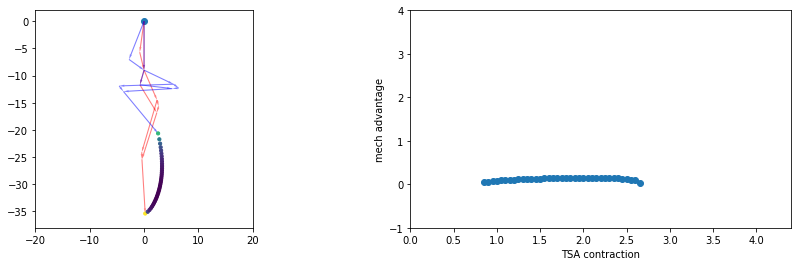

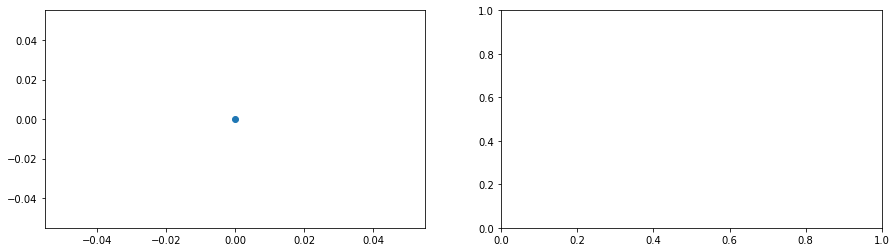

In [94]:
objective(x0)
print(try_config(step=0.05))

objective([2.7, 1.2, 3.4, 6, 1.5, 6, 10, 1.2, 9, 1.5, 10, -1.5707963267948966, -1.8465583486100006, 0.17453292519943295, 0.03490658503988659, 0.03490658503988659, 0.17453292519943295])
print(try_config(step=0.05))

# objective([ 8.99929771,  2.8000103 ,  3.40034961,  6.00066904,  1.20039999,
#         5.99930793, 10.00044037,  1.19909615,  8.99957612,  1.30027016,
#        10.00000394, -1.56890543, -1.84838088,  0.17580208,  0.03512968,
#         0.03504082,  0.17453293])
# print(try_config(step=0.05))

# objective([ 8.99,  2.8 ,  3.41,  6.01,  1.21,  5.99, 10.01,  1.18,  8.99,
#         1.31, 10.  , -1.53, -1.88,  0.2 ,  0.04,  0.04,  0.17])
# print(try_config(step=0.05))

# objective([ 8.9931839 ,  2.79971467,  3.4037321 ,  6.00615432,  1.20308221,
#         5.9937161 , 10.00537902,  1.19105397,  8.99482053,  1.30325043,
#        10.00005633, -1.55343302, -1.8629825 ,  0.18544841,  0.03776224,
#         0.03670929,  0.17453293])
# print(try_config(step=0.05))

In [ ]:
# print(res)
# objective(res[0])

9
try 12.584848120147914


NameError: name 'res' is not defined

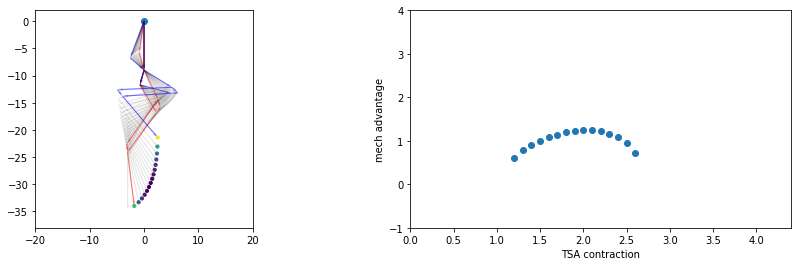

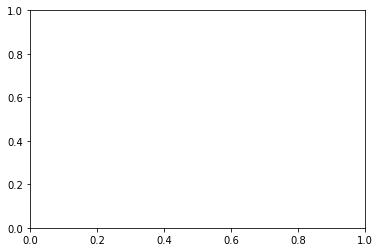

In [ ]:
print(L1)
print('try', try_config())
f, ax = plt.subplots()
objective(res[0], doPlot=True)

print(np.linalg.norm(res[0] - x0))